# Heat Pump Accelerator Analysis 

### Import Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp

### Import Dataset

More information here: https://data.boston.gov/dataset/property-assessment


In [22]:
prop_assess = pd.read_csv('https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/c4b7331e-e213-45a5-adda-052e4dd31d41/download/data2021-full.csv',
dtype=object)

In [24]:
prop_assess['GIS_ID'].head(5)

0    0100001000
1    0100002000
2    0100003000
3    0100004000
4    0100005000
Name: GIS_ID, dtype: object

Then, we join the property assessment data to the parcel data.

In [2]:
parcels = gp.read_file("https://bostonopendata-boston.opendata.arcgis.com/datasets/boston::parcels-2021.geojson")

In [25]:
parcels.dtypes

OBJECTID_1          int64
OBJECTID            int64
MAP_PAR_ID         object
LOC_ID             object
POLY_TYPE          object
MAP_NO             object
SOURCE             object
PLAN_ID            object
LAST_EDIT           int64
BND_CHK            object
NO_MATCH           object
TOWN_ID             int64
Shape_STAr        float64
Shape_STLe        float64
Shape_ST_1        float64
Shape_ST_2        float64
Shape__Area       float64
Shape__Length     float64
geometry         geometry
dtype: object

### Summarize Dataset

In [ ]:
prop_assess.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,PlUMBING,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000.0,104 A 104,PUTNAM ST,NaN,EAST BOSTON,2128,1.0,1.0,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,NaN,NaN,3.0,A - Average,NaN
1,100002000,NaN,100002000.0,197,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,NaN,NaN,NaN,A - Average,NaN
2,100003000,NaN,100003000.0,199,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,NaN,NaN,NaN,A - Average,NaN
3,100004000,NaN,100004000.0,201,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,NaN,NaN,NaN,A - Average,NaN
4,100005000,NaN,100005000.0,203,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,NaN,NaN,NaN,A - Average,NaN


In [ ]:
prop_assess.shape

(177091, 63)

### Filter Rows

In [ ]:
#Get distinct values for City
prop_assess["CITY"].unique()

array(['EAST BOSTON', 'BOSTON', 'JAMAICA PLAIN', 'CHARLESTOWN', 'ROXBURY',
       'SOUTH BOSTON', 'ROXBURY CROSSIN', 'DORCHESTER', 'ROSLINDALE',
       'MATTAPAN', 'HYDE PARK', 'READVILLE', 'BRIGHTON', 'WEST ROXBURY',
       'CHESTNUT HILL', 'DEDHAM', 'ALLSTON', 'BROOKLINE'], dtype=object)

In [ ]:
#Get distinct values for LU_Desc
prop_assess['LU_DESC'].unique()

array(['THREE-FAM DWELLING', 'TWO-FAM DWELLING', 'CONDO MAIN',
       'RESIDENTIAL CONDO', 'SINGLE FAM DWELLING', 'MULTIPLE BLDGS/1 LOT',
       'APT 4-6 UNITS', 'RESTAURANT/Lounge', 'RES /COMMERCIAL USE',
       'SELF-SERV STATION', 'COMM MULTI-USE', 'RET/WHSL/SERVICE',
       'RETAIL STORE DETACH', 'OFFICE 1-2 STORY', 'CITY OF BOSTON',
       'RES LAND (Unusable)', 'OTHER EXEMPT BLDG', 'REPAIR GARAGE',
       'RES ANCILL IMPROVEMT', 'APT 7-30 UNITS', 'PARKING LOT',
       'OFFICE: INDUSTRIAL', 'WAREHOUSE /DISTRIB', 'STRIP CTR STORES',
       'RESTAURANT/Cafeteria', 'MEDICAL OFFICE', 'COM BILLBOARD',
       'Commonwealth of Mass', 'OTHER PUBLIC LAND', 'COMMERCIAL LAND',
       'PAY PARKING LOT', 'COM LAND (Unusable)', 'MINI-STORAGE WHSE',
       'TANKS: Above Ground', 'STEAM/WATER/SEWER', 'CAR WASH',
       'FAST FOOD Restaurant', 'OFFICE 3-9 STORY', 'OLD WHSE, GARAGE',
       'HOTEL', 'LUXURY APARTMENT', 'SUBSD HOUSING S- 8',
       'COM LAND (Secondary)', 'RESIDENTIAL LAND', 'PRIV S

In [32]:
#filter cities
prop_assess2 = prop_assess[prop_assess['CITY'].isin(['MATTAPAN', 'DORCHESTER', 'ROXBURY', 'ROXBURY CROSSIN'])]
prop_assess2.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,PlUMBING,NUM_PARKING,PROP_VIEW,CORNER_UNIT
9611,0200212010,0200212010,0200212010,67,GREEN ST,NaN,ROXBURY,02119,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34603,0400554188,0400554010,0400554010,301 319,COLUMBUS AV,37,ROXBURY,02119,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38263,0402025000,NaN,0402025000,105 117,WARD ST,NaN,ROXBURY CROSSIN,02120,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38264,0402026000,NaN,0402026000,143,WARD ST,NaN,ROXBURY CROSSIN,02120,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38279,0402042000,NaN,0402042000,NaN,PRENTISS ST,NaN,ROXBURY CROSSIN,02120,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#filter to 1, 2, & 3 family homes
prop_assess3 = prop_assess2[prop_assess2['LU_DESC'].isin(['THREE-FAM DWELLING', 'TWO-FAM DWELLING', 'SINGLE FAM DWELLING'])]
prop_assess3.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,PlUMBING,NUM_PARKING,PROP_VIEW,CORNER_UNIT
71526,0702728000,NaN,0702728000,141,BUTTONWOOD ST,NaN,DORCHESTER,02125,1,1,...,NaN,NaN,F - Forced Hot Air,NaN,N - None,NaN,NaN,2,F - Fair,NaN
71529,0702731000,NaN,0702731000,8,LOCUST ST,NaN,DORCHESTER,02125,1,1,...,NaN,NaN,W - Ht Water/Steam,NaN,N - None,NaN,NaN,NaN,F - Fair,NaN
71544,0702743000,NaN,0702743000,19,LOCUST ST,NaN,DORCHESTER,02125,1,1,...,NaN,NaN,F - Forced Hot Air,NaN,N - None,NaN,NaN,2,F - Fair,NaN
71545,0702744000,NaN,0702744000,132,BUTTONWOOD ST,NaN,DORCHESTER,02125,1,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,NaN,NaN,3,A - Average,NaN
71546,0702744001,NaN,0702744001,128,BUTTONWOOD ST,NaN,DORCHESTER,02125,1,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,NaN,NaN,2,A - Average,NaN


In [34]:
#filter to owner occupied only
prop_assess4 = prop_assess3[prop_assess3['OWN_OCC'] == 'Y' ]
prop_assess4.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,PlUMBING,NUM_PARKING,PROP_VIEW,CORNER_UNIT
71546,0702744001,NaN,0702744001,128,BUTTONWOOD ST,NaN,DORCHESTER,02125,1,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,NaN,NaN,2,A - Average,NaN
71547,0702745000,NaN,0702745000,124,BUTTONWOOD ST,NaN,DORCHESTER,02125,1,1,...,S - Semi-Modern,S - Semi-Modern,F - Forced Hot Air,NaN,N - None,NaN,NaN,NaN,A - Average,NaN
71549,0702747000,NaN,0702747000,120,BUTTONWOOD ST,NaN,DORCHESTER,02125,1,1,...,NaN,NaN,W - Ht Water/Steam,NaN,D - Ductless AC,NaN,NaN,NaN,A - Average,NaN
71556,0702752000,NaN,0702752000,100,BUTTONWOOD ST,NaN,DORCHESTER,02125,1,1,...,NaN,NaN,F - Forced Hot Air,NaN,N - None,NaN,NaN,NaN,A - Average,NaN
71557,0702753000,NaN,0702753000,98,BUTTONWOOD ST,NaN,DORCHESTER,02125,1,1,...,NaN,NaN,F - Forced Hot Air,NaN,C - Central AC,NaN,NaN,2,A - Average,NaN


In [ ]:
#how many properties sit on the same parcel? anti join the join key

In [ ]:
# is there building data in the parcel dataset?

In [ ]:
# is there basement data in the property assessment dataset?

### Summarize Filtered Dataset

In [ ]:
prop_assess4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 71546 to 134517
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              14121 non-null  int64  
 1   CM_ID            2 non-null      float64
 2   GIS_ID           14121 non-null  float64
 3   ST_NUM           14109 non-null  object 
 4   ST_NAME          14121 non-null  object 
 5   UNIT_NUM         0 non-null      object 
 6   CITY             14121 non-null  object 
 7   ZIPCODE          14121 non-null  int64  
 8   BLDG_SEQ         14121 non-null  float64
 9   NUM_BLDGS        14121 non-null  float64
 10  LUC              14121 non-null  int64  
 11  LU               14121 non-null  object 
 12  LU_DESC          14121 non-null  object 
 13  BLDG_TYPE        14121 non-null  object 
 14  OWN_OCC          14121 non-null  object 
 15  OWNER            14117 non-null  object 
 16  MAIL_ADDRESSEE   1576 non-null   object 
 17  MAIL_AD

In [35]:
#null value count 
prop_assess4.isna().sum().sort_values(ascending=False).head(20)

COM_UNITS          14121
UNIT_NUM           14121
BDRM_COND          14120
PlUMBING           14120
CD_FLOOR           14120
CORNER_UNIT        14119
HEAT_FUEL          14119
CM_ID              14119
RES_UNITS          14117
MAIL_ADDRESSEE     12545
FIRE_PLACE         11268
KITCHEN_STYLE3     10941
HLF_BTH             9736
YR_REMODEL          8993
BTHRM_STYLE3        8240
KITCHEN_STYLE2      6128
NUM_PARKING         2889
BTHRM_STYLE2        1598
LAND_VALUE           669
STRUCTURE_CLASS      153
dtype: int64

### Select Features

In [36]:
#Select Important Features to Analyze
#Include IDs, owner names, and addresses
prop_assess_list = prop_assess4[['CITY', 'LU', 'LU_DESC', 'OWN_OCC', 'HEAT_TYPE', 'AC_TYPE', 'RES_FLOOR', 
              'YR_REMODEL', 'YR_BUILT', 'FIRE_PLACE', 'BLDG_TYPE', 'STRUCTURE_CLASS', 'INT_WALL', 'INT_COND', 
              'LAND_SF', 'TT_RMS', 'GROSS_AREA', 'LIVING_AREA', 'EXT_COND', 'BED_RMS','EXT_FINISHED','HEAT_FUEL',
              'PID', 'GIS_ID', 'OWNER']].copy()
prop_assess_list.head()

,CITY,LU,LU_DESC,OWN_OCC,HEAT_TYPE,AC_TYPE,RES_FLOOR,YR_REMODEL,YR_BUILT,FIRE_PLACE,...,TT_RMS,GROSS_AREA,LIVING_AREA,EXT_COND,BED_RMS,EXT_FINISHED,HEAT_FUEL,PID,GIS_ID,OWNER
71546,DORCHESTER,R3,THREE-FAM DWELLING,Y,F - Forced Hot Air,C - Central AC,3,NaN,2003,NaN,...,18,6476,4470,G - Good,9,C - Cement Board,NaN,0702744001,0702744001,DARMETKO HENRY
71547,DORCHESTER,R3,THREE-FAM DWELLING,Y,F - Forced Hot Air,N - None,3,NaN,1905,NaN,...,16,4836,3567,G - Good,6,F - Frame/Clapbrd,NaN,0702745000,0702745000,SHEQI MITI
71549,DORCHESTER,R1,SINGLE FAM DWELLING,Y,W - Ht Water/Steam,D - Ductless AC,2,NaN,1900,NaN,...,8,2630,1716,A - Average,4,M - Vinyl,NaN,0702747000,0702747000,PULAKE FATMIR
71556,DORCHESTER,R1,SINGLE FAM DWELLING,Y,F - Forced Hot Air,N - None,2,NaN,1914,NaN,...,9,2466,1538,A - Average,4,M - Vinyl,NaN,0702752000,0702752000,KANIA ANDRZEJ
71557,DORCHESTER,R1,SINGLE FAM DWELLING,Y,F - Forced Hot Air,C - Central AC,2,2001,1914,NaN,...,7,2272,1447,A - Average,3,M - Vinyl,NaN,0702753000,0702753000,BROWNE BRENDAN


In [38]:
property = parcels.merge(prop_assess_list, left_on = 'MAP_PAR_ID', right_on = 'GIS_ID', how = 'inner')

In [39]:
property.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14121 entries, 0 to 14120
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID_1       14121 non-null  int64   
 1   OBJECTID         14121 non-null  int64   
 2   MAP_PAR_ID       14121 non-null  object  
 3   LOC_ID           14121 non-null  object  
 4   POLY_TYPE        14121 non-null  object  
 5   MAP_NO           14121 non-null  object  
 6   SOURCE           14121 non-null  object  
 7   PLAN_ID          14121 non-null  object  
 8   LAST_EDIT        14121 non-null  int64   
 9   BND_CHK          14121 non-null  object  
 10  NO_MATCH         14121 non-null  object  
 11  TOWN_ID          14121 non-null  int64   
 12  Shape_STAr       14121 non-null  float64 
 13  Shape_STLe       14121 non-null  float64 
 14  Shape_ST_1       14121 non-null  float64 
 15  Shape_ST_2       14121 non-null  float64 
 16  Shape__Area      14121 non-null 

In [40]:
property.to_file("2021_parcels_property-assessment.geojson", driver='GeoJSON')

### Summarize Feature List

In [37]:
prop_assess_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 71546 to 134517
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CITY             14121 non-null  object
 1   LU               14121 non-null  object
 2   LU_DESC          14121 non-null  object
 3   OWN_OCC          14121 non-null  object
 4   HEAT_TYPE        14121 non-null  object
 5   AC_TYPE          14121 non-null  object
 6   RES_FLOOR        14120 non-null  object
 7   YR_REMODEL       5128 non-null   object
 8   YR_BUILT         14118 non-null  object
 9   FIRE_PLACE       2853 non-null   object
 10  BLDG_TYPE        14121 non-null  object
 11  STRUCTURE_CLASS  13968 non-null  object
 12  INT_WALL         14121 non-null  object
 13  INT_COND         14121 non-null  object
 14  LAND_SF          14121 non-null  object
 15  TT_RMS           14121 non-null  object
 16  GROSS_AREA       14121 non-null  object
 17  LIVING_AREA      14121 non

In [ ]:
prop_assess_list.describe()

,RES_FLOOR,YR_REMODEL,YR_BUILT,FIRE_PLACE,LAND_SF,TT_RMS,GROSS_AREA,LIVING_AREA,BED_RMS,PID,GIS_ID
count,14120.000000,5128.000000,14118.000000,2853.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,1.412100e+04,1.412100e+04
mean,2.205984,2001.008775,1918.898286,1.330880,4740.255223,10.682105,3969.538984,2601.603144,5.038666,1.483006e+09,1.483006e+09
std,0.503873,14.487033,30.999149,0.743284,2224.512988,3.778892,1441.529917,1013.190010,1.981088,2.687234e+08,2.687234e+08
min,1.000000,1915.000000,1775.000000,1.000000,404.000000,2.000000,632.000000,470.000000,1.000000,7.027440e+08,7.027440e+08
25%,2.000000,1995.000000,1900.000000,1.000000,3431.000000,7.000000,2730.000000,1740.000000,3.000000,1.303148e+09,1.303148e+09
50%,2.000000,2003.000000,1910.000000,1.000000,4344.000000,10.000000,3870.000000,2513.000000,5.000000,1.600386e+09,1.600386e+09
75%,2.500000,2012.000000,1929.000000,1.000000,5500.000000,14.000000,5056.000000,3353.000000,6.000000,1.702041e+09,1.702041e+09
max,4.000000,2019.000000,2019.000000,9.000000,48317.000000,25.000000,10984.000000,7088.000000,18.000000,1.812256e+09,1.812256e+09


In [ ]:
# Number of Potential Households per City
prop_assess_list['CITY'].value_counts()

DORCHESTER         10132
MATTAPAN            2478
ROXBURY             1309
ROXBURY CROSSIN      202
Name: CITY, dtype: int64

In [ ]:
# Breakout of single, two family, and three family homes
prop_assess_list['LU_DESC'].value_counts()

SINGLE FAM DWELLING    6286
TWO-FAM DWELLING       4748
THREE-FAM DWELLING     3087
Name: LU_DESC, dtype: int64

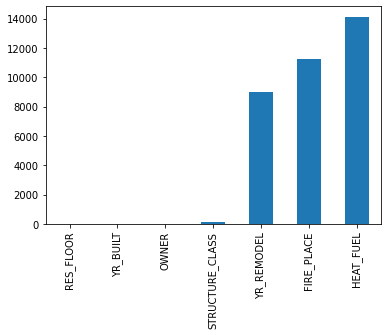

In [ ]:
#Graph of Null Value Counts
null = prop_assess_list.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

In [ ]:
#Null Values for Year Remodel
prop_assess_list['YR_REMODEL'].isnull().sum()

8993

In [ ]:
#Null Values for Fireplace
prop_assess_list['FIRE_PLACE'].isnull().sum()

11268

In [ ]:
#Proportion of Null Values for Year Remodel
8993/14121

0.636852914099568

In [ ]:
#Proportion of Null Values for Fireplace
11268/14121

0.7979604843849586

In [ ]:
#almost all have residential structure, STRUCTURE CLASS will not be useful 
prop_assess_list['STRUCTURE_CLASS'].value_counts()

R -                13949
D - Wood/Frame        15
C - Brick/Concr        3
B - Reinf Concr        1
Name: STRUCTURE_CLASS, dtype: int64

In [ ]:
#mainly normal interior wall condition, INT WALL won't be useful
prop_assess_list['INT_WALL'].value_counts()

N - Normal         14104
E - Elaborate         13
S - Substandard        4
Name: INT_WALL, dtype: int64

###Create New Combo Stat Features

In [ ]:
#Combo Stat 1 
#Create Living Space Ratio - request more details on this stat from Chris
prop_assess_list['Living_Space_Ratio'] = prop_assess_list['LIVING_AREA'] / prop_assess_list['BED_RMS']

In [ ]:
prop_assess_list['Living_Space_Ratio'].describe()

count    14121.000000
mean       531.276688
std        147.180847
min        197.428571
25%        433.333333
50%        506.666667
75%        600.833333
max       1904.000000
Name: Living_Space_Ratio, dtype: float64

In [ ]:
#Combo Stat 2
#Lot Size - (Living Area / Story Height)
prop_assess_list['Combo_Stat_2'] = prop_assess_list['LAND_SF'] - (prop_assess_list['LIVING_AREA'] / prop_assess_list['RES_FLOOR'])

In [ ]:
prop_assess_list['Combo_Stat_2'].describe()

count    14120.000000
mean      3568.873526
std       2136.301558
min       -247.500000
25%       2287.800000
50%       3187.000000
75%       4278.250000
max      46465.000000
Name: Combo_Stat_2, dtype: float64

In [ ]:
#Create New Ratio "Total Room Ratio"
prop_assess_list['TT_ROOM_Ratio'] = prop_assess_list['LIVING_AREA'] / prop_assess_list['TT_RMS']

In [ ]:
prop_assess_list['TT_ROOM_Ratio'].head(3)

71546    248.333333
71547    222.937500
71549    214.500000
Name: TT_ROOM_Ratio, dtype: float64

In [ ]:
#Create New Ratio "Lot Ratio"
prop_assess_list['LOT_RATIO'] = prop_assess_list['LAND_SF'] / prop_assess_list['RES_FLOOR']

In [ ]:
prop_assess_list['LOT_RATIO'].value_counts()

2000.0    308
2500.0    253
1600.0    165
1800.0    135
1500.0     92
         ... 
2397.0      1
2483.2      1
1963.2      1
1929.2      1
4147.5      1
Name: LOT_RATIO, Length: 7303, dtype: int64

### Visualizations

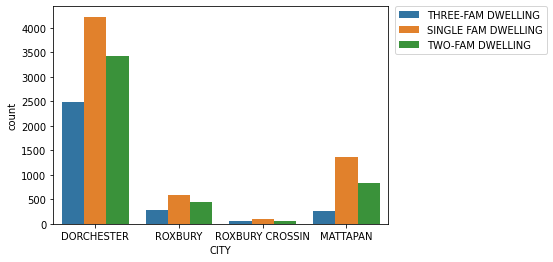

In [ ]:
#Dwelling Counts per City
sns.countplot(x='CITY', hue='LU_DESC', data=prop_assess_list)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [ ]:
prop_assess_list['HEAT_TYPE'].value_counts()

W - Ht Water/Steam    9810
F - Forced Hot Air    4021
E - Electric           211
S - Space Heat          43
P - Heat Pump           19
N - None                16
O - Other                1
Name: HEAT_TYPE, dtype: int64

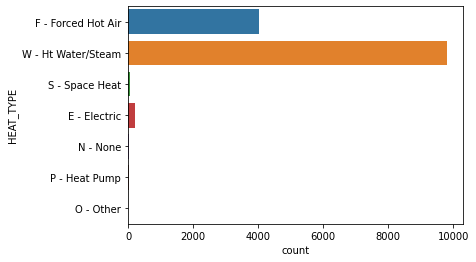

In [ ]:
sns.countplot(y='HEAT_TYPE', data=prop_assess_list)

Chris notes/comments:

Forced air and steam are interesting, bc there are multiple types of heat pumps you can implement.

For example, if you have electric heat you would likely have baseboard electric and that equipment would stay in place and put in mini-splits. As of late, there have been heat pump options that are boiler-based / air-to-water heat pumps that could be even easier to install in the hot water/steam residences.

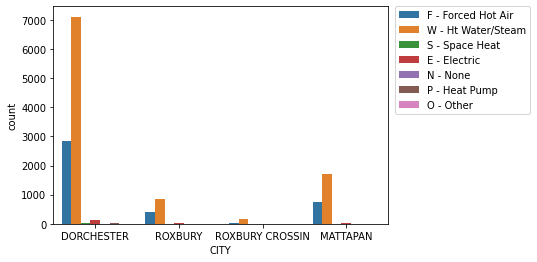

In [ ]:
#Heat Type per City
sns.countplot(x='CITY', hue='HEAT_TYPE', data=prop_assess_list)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
prop_assess_list['AC_TYPE'].value_counts()

N - None           12711
C - Central AC      1345
D - Ductless AC       65
Name: AC_TYPE, dtype: int64

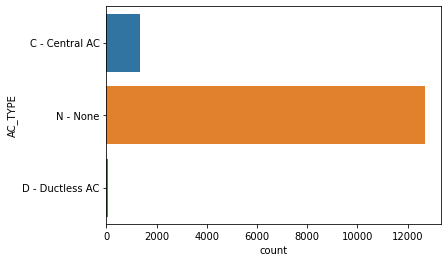

In [ ]:
sns.countplot(y='AC_TYPE', data=prop_assess_list)
## None could include dwellings that only have window units; these dwellings may just not have central air
## Or potentially ductless AC could mean window units
## ***what is ductless AC?

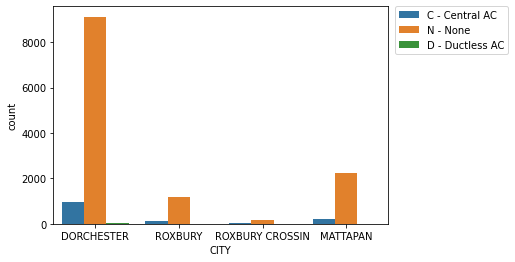

In [ ]:
#AC Type per City
sns.countplot(x='CITY', hue='AC_TYPE', data=prop_assess_list)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

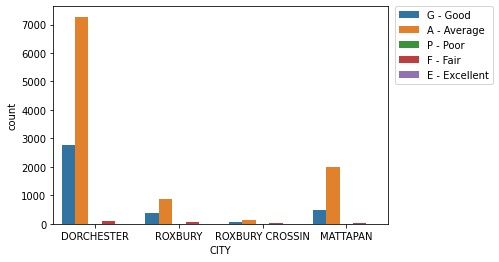

In [ ]:
#Interior condition per City
sns.countplot(x='CITY', hue='INT_COND', data=prop_assess_list)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### question for assesors: how is the condition determined?

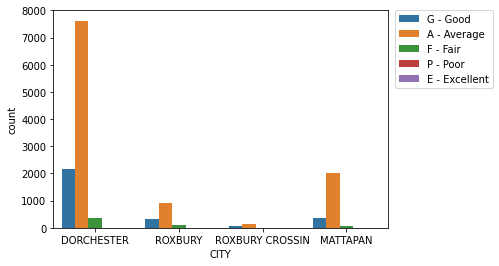

In [ ]:
#Exterior condition per City 
sns.countplot(x='CITY', hue='EXT_COND', data=prop_assess_list)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


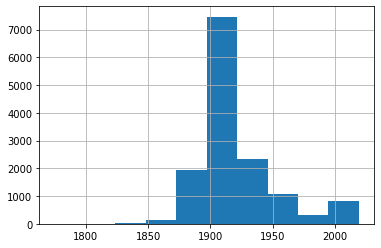

In [ ]:
#Year Built Distribution
prop_assess_list['YR_BUILT'].hist()

In [ ]:
prop_assess_list['YR_REMODEL'].count()

5128

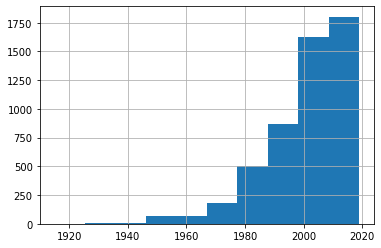

In [ ]:
#Year Remodeled Distribution
prop_assess_list['YR_REMODEL'].hist()

## is there any way to determine what was remodelled? assesor input?

In [ ]:
#Number of Floors
prop_assess_list['RES_FLOOR'].value_counts()

## what is half a floor? ***

2.0    7679
2.5    2638
3.0    2570
1.0     798
1.5     420
4.0      10
3.5       5
Name: RES_FLOOR, dtype: int64

******Chris note: 3+ floor houses may not be able to have a heat pump. Chris to look into this.

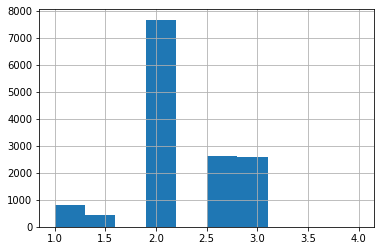

In [ ]:
prop_assess_list['RES_FLOOR'].hist()

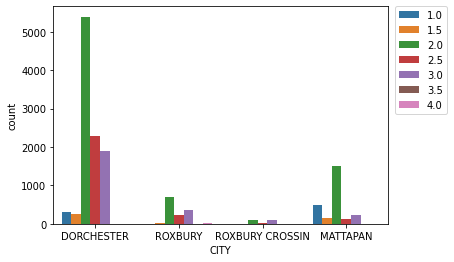

In [ ]:
#Floor Counts per City
sns.countplot(x='CITY', hue='RES_FLOOR', data=prop_assess_list)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [ ]:
prop_assess_list['EXT_FINISHED'].value_counts()

M - Vinyl            7917
W - Wood Shake       2536
F - Frame/Clapbrd    1392
A - Asbestos          978
B - Brick/Stone       605
C - Cement Board      235
P - Asphalt           234
U - Alum Siding       105
S - Stucco            102
V - Brck/Stn Venr      13
O - Other               2
G - Glass               2
Name: EXT_FINISHED, dtype: int64

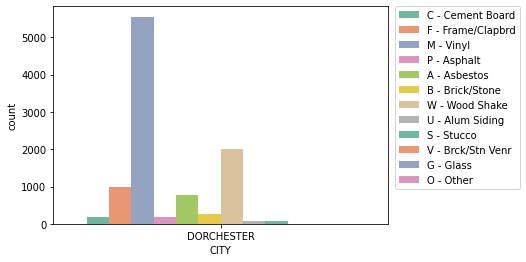

In [ ]:
#DORCHESTER exterior finish
sns.countplot(x= 'CITY', hue='EXT_FINISHED', data=prop_assess_list[prop_assess_list.CITY == 'DORCHESTER'], palette = 'Set2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


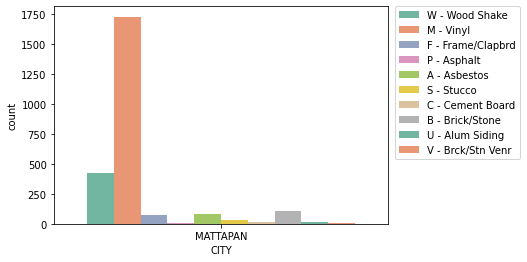

In [ ]:
#MATTAPAN exterior finish
sns.countplot(x= 'CITY', hue='EXT_FINISHED', data=prop_assess_list[prop_assess_list.CITY == 'MATTAPAN'], palette = 'Set2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


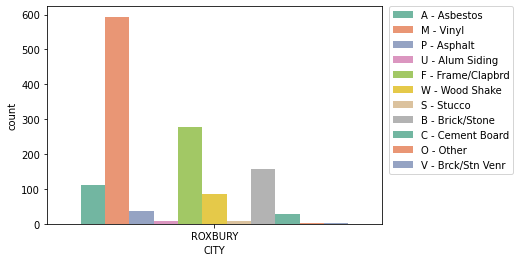

In [ ]:
#ROXBURY exterior finish
sns.countplot(x= 'CITY', hue='EXT_FINISHED', data=prop_assess_list[prop_assess_list.CITY == 'ROXBURY'], palette = 'Set2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


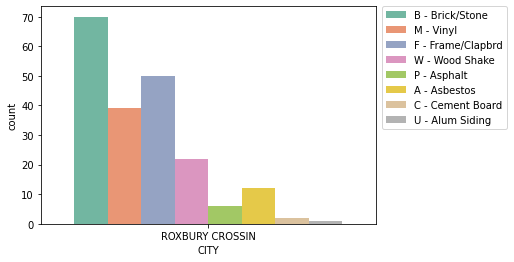

In [ ]:
#ROXBURY CROSSING exterior finish
sns.countplot(x= 'CITY', hue='EXT_FINISHED', data=prop_assess_list[prop_assess_list.CITY == 'ROXBURY CROSSIN'], palette = 'Set2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [ ]:
yrbuilt_peak = prop_assess_list[(prop_assess_list.YR_BUILT > 1970) & (prop_assess_list.YR_BUILT < 2017)]

In [ ]:
yrbuilt_peak['YR_BUILT'].value_counts().sort_index()

1971.0     3
1972.0     2
1975.0     1
1980.0     5
1981.0     3
1982.0     2
1983.0     3
1984.0    17
1985.0    24
1986.0    16
1987.0    19
1988.0    16
1989.0    28
1990.0    21
1991.0    91
1992.0    10
1993.0    12
1994.0    34
1995.0    13
1996.0    20
1997.0    13
1998.0    47
1999.0    20
2000.0    74
2001.0    64
2002.0    43
2003.0    64
2004.0    95
2005.0    78
2006.0    44
2007.0    51
2008.0    33
2009.0    16
2010.0    27
2011.0     1
2012.0     8
2013.0     8
2014.0     8
2015.0     4
2016.0    18
Name: YR_BUILT, dtype: int64

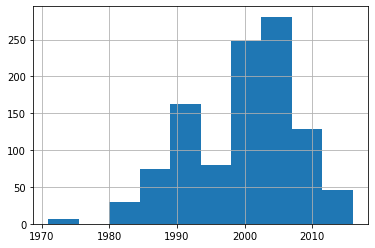

In [ ]:
yrbuilt_peak['YR_BUILT'].hist()

In [ ]:
prop_assess_list['BED_RMS'].value_counts()

3.0     3083
4.0     2976
6.0     2932
5.0     2079
9.0      994
7.0      703
8.0      587
2.0      538
10.0      81
11.0      62
12.0      61
1.0       16
14.0       6
15.0       2
18.0       1
Name: BED_RMS, dtype: int64

## Scoring Rubric

|Field|	Included in DB?|	Included in Scoring?|	Scoring Rank|	Notes:|	Example Data|
|---|---|---|---|---|---|
|Bedrooms:|	Y|	Y|	?|	May be useful in scoring if we learn more details|	6|
|Interior Condition:|	Y|	Y|	?|	May be useful in scoring if we learn more details|	Good|
|Exterior Finish:|	Y	|Y|	?|	May be useful in scoring if we learn more details|	Good|
|Exterior Condition:|	Y|	Y|	?|	May be useful in scoring if we learn more details|	Frame/Clapbrd|
|Heating Fuel Type [NOT in the Boston Data]	|Y|	Y|	(1)|	10 - electric resistance, 8 - oil , 4 - natural gas|	|
|Heat Type:|	Y|	Y|	1|	[Need to review options for proper scoring]|	Ht Water/Steam|
|AC Type:|	Y|	Y|	2|	Check values (Window, Central, None?)|	None|
|Year Built:|	Y|	Y|	3|	Separate note on scoring for this below*|	2004|
|Living Area:|	|Y	|Y	|4T	|Combo stat 1: Living Area / Total Rooms	|2,420 sq ft|
|Total Rooms:|	Y|	Y|	4T|	Combo stat 1: Living Area / Total Rooms|	12|
|Lot Size:|	Y|	Y|	5T|	Possible Combo stat2: Lot size - (Living Area/story Height)|	3,200 sq ft|
|Story Height:|	Y|	Y|	5T|	Possible Combo stat2: Lot size - (Living Area/story Height)|	3|
|Bathrooms:|	Y|	N|	n/a|		|3|
|Parcel ID:|	Y|	N|	n/a|		||1200016000|
|Address:|	Y|	N|	n/a|	Potential to include in scoring if we can map areas with no natural gas service|	8 WARREN PL BOSTON MA 02119|
|Property Type:|	Y|	N|	n/a|		||Two Family|
|Classification Code:|	Y|	N|	n/a|		|0104 (Residential Property / TWO-FAM DWELLING)|
|Owner on Saturday, January 1, 2022:|	Y|	N|	n/a||		
|Owner's Mailing Address:|	Y|	N|	n/a|	Must be the same as parcel address for record to be included in DB|	13 ROCKLAND AV ROXBURY MA 02119|
|Land Use:|	Y|	N|	n/a|		||104 - TWO-FAM DWELLING|
|Style:|	Y|	N|	n/a|		|Conventional|
|Fireplaces:|	Y|	N|	n/a|		||0|
|Residential Exemption:|	N|	N|	n/a|		||Yes|
|Personal Exemption:|	N|	N|	n/a|		||No|
|Other Fixtures:|	N|	N|	n/a|		||0|
|Half Bathrooms:|	N|	N|	n/a|		||0|
|Bath Style 1:|	N|	N|	n/a|		||Modern|
|Bath Style 2:|	N|	N|	n/a|		||Modern|
|Bath Style 3:|	N|	N|	n/a|		||Modern|
|Number of Kitchens:|	N|	N|	n/a|		||2|
|Kitchen Type:|	N|	N|	n/a|		||2 Full Eat In Kitchens|
|Kitchen Style 1:|	N|	N|	n/a|		||Modern|
|Kitchen Style 2:|	N|	N|	n/a|		||Modern|
|Kitchen Style 3:|	N|	N|	|n/a|||		
|Interior Finish:|	N|	N|	n/a|		||Normal|
|View:|	N|	N|	n/a|		||Fair|
|Grade:|	N|	N|	n/a|		||Average|
|Parking Spots:|	N|	N|	n/a|		||2|
|Roof Cover:|	N|	N|	n/a|		||Asphalt Shingl|
|Roof Structure:|	N|	N|	n/a|		||Gable|
|Foundation:|	N|	N|	n/a|		||Concrete|
					
					
					
					
					
*Year Built - Note on Scoring					
Any value that is <5 years from today - too recently built, owner has all new equipment, less likely to swap out for heat pumps					
Scoring high and higher as YB date is older from 5 years from today					
Peak score is 20+/- years from today (2000-4) - expectation that original equipment, if present, would be prime for replacement					
High score maintains back to 1970 (during oil crisis of '73, new houses began to be built with more insulation, in '70 ductwork sizing was standardized)					

|Field|	Included in DB?|	Included in Scoring?|	Scoring Rank|	Notes:|	Example Data|
|---|---|---|---|---|---|
|Bedrooms:|	Y|	Y|	?|	May be useful in scoring if we learn more details|	6|
|Interior Condition:|	Y|	Y|	?|	May be useful in scoring if we learn more details|	Good|
|Exterior Finish:|	Y	|Y|	?|	May be useful in scoring if we learn more details|	Good|
|Exterior Condition:|	Y|	Y|	?|	May be useful in scoring if we learn more details|	Frame/Clapbrd|
|Heating Fuel Type [NOT in the Boston Data]	|Y|	Y|	(1)|	10 - electric resistance, 8 - oil , 4 - natural gas|	|
|Heat Type:|	Y|	Y|	1|	[Need to review options for proper scoring]|	Ht Water/Steam|
|AC Type:|	Y|	Y|	2|	Check values (Window, Central, None?)|	None|
|Year Built:|	Y|	Y|	3|	Separate note on scoring for this below*|	2004|
|Living Area:|	|Y	|Y	|4T	|Combo stat 1: Living Area / Total Rooms	|2,420 sq ft|
|Total Rooms:|	Y|	Y|	4T|	Combo stat 1: Living Area / Total Rooms|	12|
|Lot Size:|	Y|	Y|	5T|	Possible Combo stat2: Lot size - (Living Area/story Height)|	3,200 sq ft|
|Story Height:|	Y|	Y|	5T|	Possible Combo stat2: Lot size - (Living Area/story Height)|	3|

## Scoring Functions

In [ ]:
def bedroom_score(x):
    if x>2:
        return 10
    else:
        return 2

In [ ]:
def int_condition_score(x):
    if x=='A - Average':
        return 10
    elif x=='G - Good':
        return 8
    elif x=='F - Fair':
        return 6
    elif x=='E - Excellent':
        return 4
    elif x=='P - Poor':
        return 2
    else:
        return 0

In [ ]:
def ext_finish_score(x):
    if x=="M - Vinyl":
        return 10
    elif x=="W - Wood Shake":
        return 9
    elif x=="F - Frame/Clapbrd":
        return 8
    elif x=="A - Asbestos":
        return 7
    elif x=="B - Brick/Stone":
        return 6
    elif x=="C - Cement Board":
        return 5
    elif x=="P - Asphalt":
        return 4
    elif x=="U - Alum Siding":
        return 3
    elif x=="S - Stucco":
        return 2
    elif x=="V - Brck/Stn Venr":
        return 1
    elif x=="O - Other":
        return 0
    elif x=="G - Glass":
        return 0
    else:
        return 0

In [ ]:
def ext_condition_score(x):
    if x=='A - Average':
        return 10
    elif x=='G - Good':
        return 8
    elif x=='F - Fair':
        return 6
    elif x=='E - Excellent':
        return 4
    elif x=='P - Poor':
        return 2
    else:
        return 0

In [ ]:
def heat_fuel_score(x):
    if x=="I - Indiv. Cntrl":
        return 10
    elif x=="C - Common":
        return 5
    else:
        return 0

In [ ]:
def heat_type_score(x):
    if x=="W - Ht Water/Steam":
        return 10
    elif x=="F - Forced Hot Air":
        return 8
    elif x=="E - Electric":
        return 6
    elif x=="S - Space Heat":
        return 5
    elif x=="P - Heat Pump":
        return 4
    elif x=="N - None":
        return 2
    elif x=="O - Other":
        return 1
    else: 
        return 0

In [ ]:
def ac_score(x):
    if x=="N - None":
        return 10
    elif x=="C - Central AC":
        return 5
    elif x=="D - Ductless AC":
        return 2
    else:
        return 0

In [ ]:
def yr_built_score(x):
    if x<2000:
        return 10
    elif x>=2000:
        return 0
    else:
        return 0

In [ ]:
def living_area_score(x):
    if x<100:
        return 10
    elif x>=100:
        return 20
    else:
        return 0

In [ ]:
def total_rooms_score(x):
    if x>2:
        return 10
    else:
        return 2

In [ ]:
def lot_size_score(x):
    if x>2:
        return 10
    else:
        return 2

In [ ]:
def story_height_score(x):
    if x>2500:
        return 10
    else:
        return 5

## Applying Scoring Functions To Data

In [ ]:
# prop_assess4['BEDROOM_SCORE'] = prop_assess4.BED_RMS.apply(bedroom_score)
# prop_assess4['BED_RMS'] = prop_assess4['BED_RMS'].astype(int)
# prop_assess4['BED_RMS'].value_counts()

In [ ]:
prop_assess_list['BEDROOM_SCORE'] = prop_assess_list.apply(lambda x: bedroom_score(x['BED_RMS']),axis=1)

In [ ]:
prop_assess_list['INT_COND_SCORE'] = prop_assess_list.apply(lambda x: int_condition_score(x['INT_COND']),axis=1)

In [ ]:
prop_assess_list['EXT_FINISH_SCORE'] = prop_assess_list.apply(lambda x: ext_finish_score(x['EXT_FINISHED']),axis=1)

In [ ]:
prop_assess_list['EXT_COND_SCORE'] = prop_assess_list.apply(lambda x: ext_condition_score(x['EXT_COND']),axis=1)

In [ ]:
prop_assess_list['HEAT_FUEL_SCORE'] = prop_assess_list.apply(lambda x: heat_fuel_score(x['HEAT_FUEL']),axis=1)

In [ ]:
prop_assess_list['HEAT_TYPE_SCORE'] = prop_assess_list.apply(lambda x: heat_type_score(x['HEAT_TYPE']),axis=1)

In [ ]:
prop_assess_list['AC_TYPE_SCORE'] = prop_assess_list.apply(lambda x: ac_score(x['AC_TYPE']),axis=1)

In [ ]:
prop_assess_list['YR_BUILT_SCORE'] = prop_assess_list.apply(lambda x: yr_built_score(x['YR_BUILT']),axis=1)

In [ ]:
prop_assess_list['LIVING_AREA_SCORE'] = prop_assess_list.apply(lambda x: living_area_score(x['Living_Space_Ratio']),axis=1)

In [ ]:
prop_assess_list['TT_ROOM_SCORE'] = prop_assess_list.apply(lambda x: bedroom_score(x['BED_RMS']),axis=1)

In [ ]:
prop_assess_list['LOT_SIZE_SCORE'] = prop_assess_list.apply(lambda x: int_condition_score(x['INT_COND']),axis=1)

In [ ]:
prop_assess_list['STORY_HT_SCORE'] = prop_assess_list.apply(lambda x: story_height_score(x['LOT_RATIO']),axis=1)

In [ ]:
prop_assess_list.head()

,CITY,LU,LU_DESC,OWN_OCC,HEAT_TYPE,AC_TYPE,RES_FLOOR,YR_REMODEL,YR_BUILT,FIRE_PLACE,...,EXT_FINISH_SCORE,EXT_COND_SCORE,HEAT_FUEL_SCORE,HEAT_TYPE_SCORE,AC_TYPE_SCORE,YR_BUILT_SCORE,LIVING_AREA_SCORE,TT_ROOM_SCORE,LOT_SIZE_SCORE,STORY_HT_SCORE
71546,DORCHESTER,R3,THREE-FAM DWELLING,Y,F - Forced Hot Air,C - Central AC,3.0,NaN,2003.0,NaN,...,5,8,0,8,5,0,20,10,8,5
71547,DORCHESTER,R3,THREE-FAM DWELLING,Y,F - Forced Hot Air,N - None,3.0,NaN,1905.0,NaN,...,8,8,0,8,10,10,20,10,10,5
71549,DORCHESTER,R1,SINGLE FAM DWELLING,Y,W - Ht Water/Steam,D - Ductless AC,2.0,NaN,1900.0,NaN,...,10,10,0,10,2,10,20,10,10,5
71556,DORCHESTER,R1,SINGLE FAM DWELLING,Y,F - Forced Hot Air,N - None,2.0,NaN,1914.0,NaN,...,10,10,0,8,10,10,20,10,10,5
71557,DORCHESTER,R1,SINGLE FAM DWELLING,Y,F - Forced Hot Air,C - Central AC,2.0,2001.0,1914.0,NaN,...,10,10,0,8,5,10,20,10,8,5
